<a href="https://www.kaggle.com/code/shivankv098/restaurant-revenue-prediction-modelbuilding?scriptVersionId=159552103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv


In [2]:
df = pd.read_csv('/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv')
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


Data contain 1000 rows and 8 columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


* There are no null values.
* There is only one categorical feature which is "Cuisine_Type".


In [4]:
df.describe(include='all')

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Japanese,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,262,NaN,NaN,NaN,NaN
mean,53.271000,30.219120,9.958726,NaN,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,NaN,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,NaN,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,NaN,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,NaN,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,NaN,39.553220,1.000000,76.000000,343.395793


There are lot of insights that can be drawn from the above code:  
(Per Month)

* There are 4 cuisine types.
* Amoung all the cuisine types Japanese cuisine is the most ordered by the customers.
* On an average 53 customers arrives in the restaurant with a range of +-(26).
* Average customer spending is about 29.47 with a range of +-(11.47).
* Average Monthly Revenue is around 268.72 with a range of +-(104).


# **EDA**

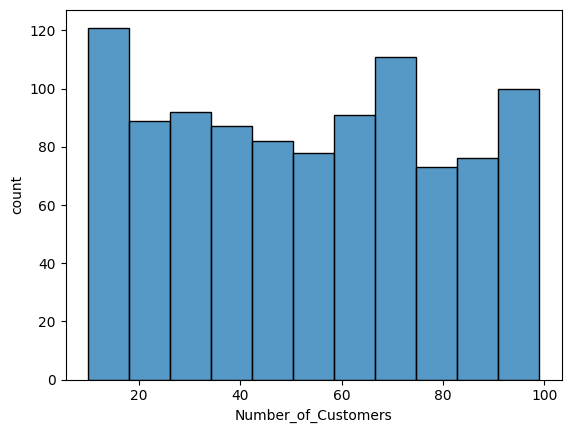

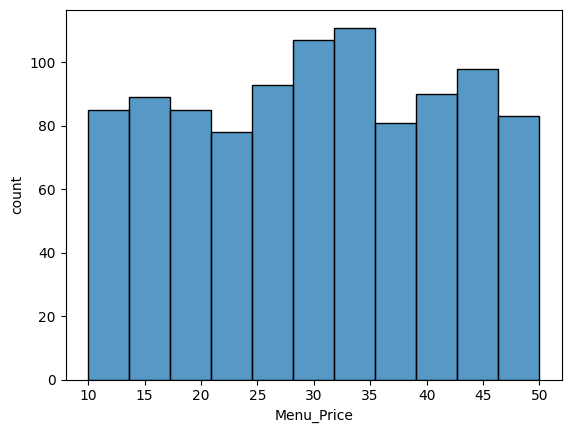

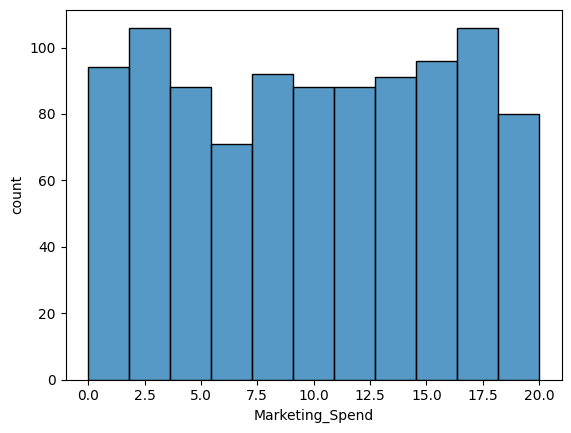

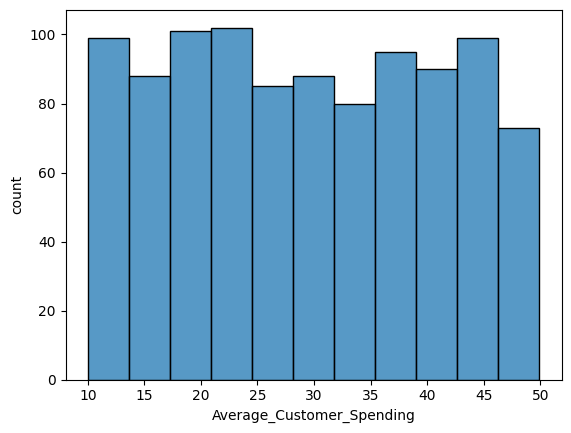

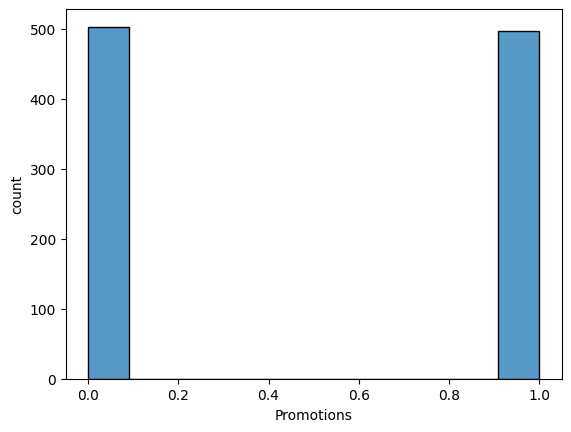

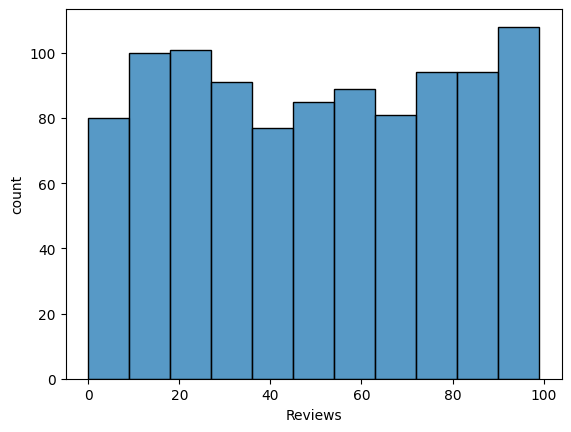

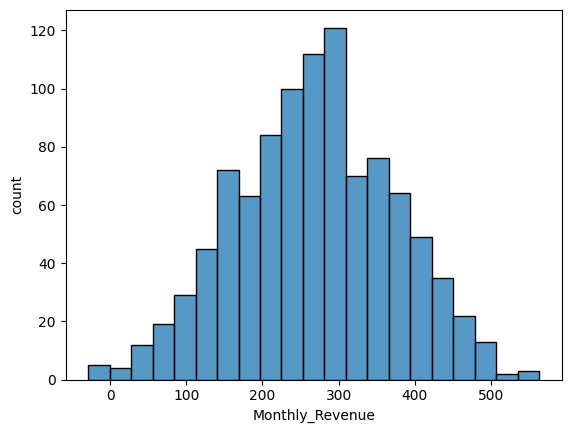

In [5]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.histplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

# Checking for outliers

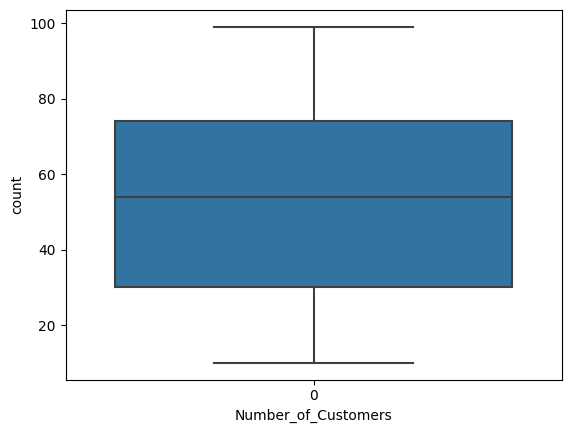

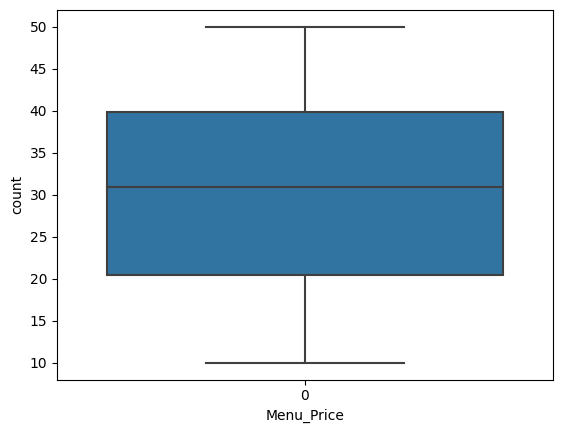

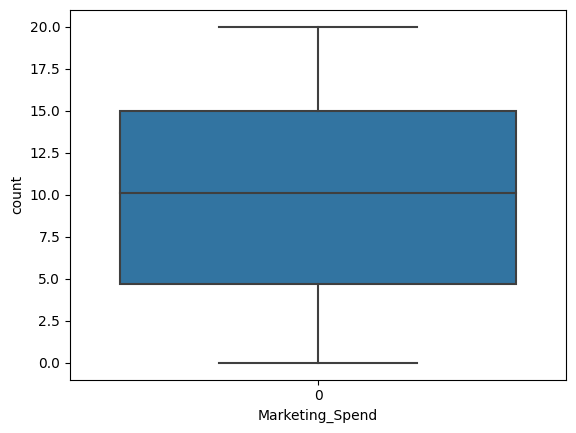

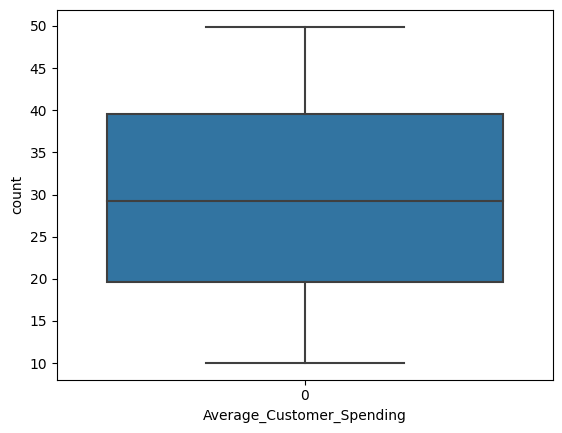

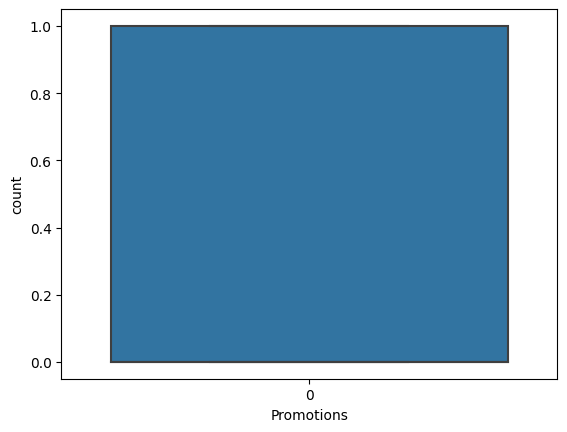

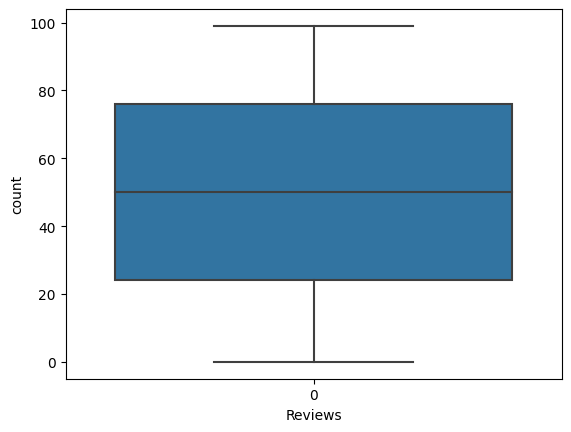

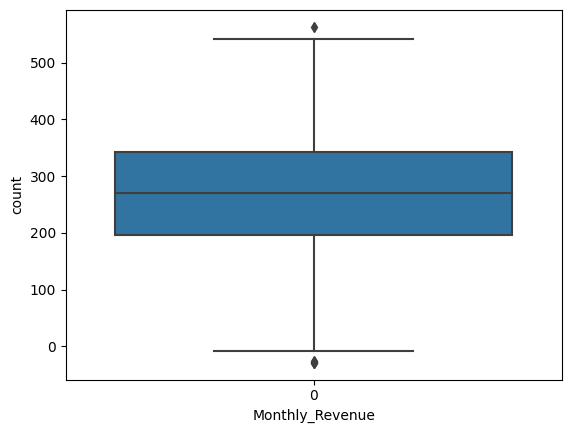

In [6]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

# Label Encoding  
Using Label Encoding on "Cuisine_Type" to convert each unique category into an integer.

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Cuisine_Type'] = le.fit_transform(df['Cuisine_Type'])

In [8]:
X = df.iloc[:,:-1]
y = df.Monthly_Revenue

In [9]:
X

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews
0,61,43.117635,12.663793,2,36.236133,0,45
1,24,40.020077,4.577892,1,17.952562,0,36
2,81,41.981485,4.652911,2,22.600420,1,91
3,70,43.005307,4.416053,1,18.984098,1,59
4,30,17.456199,3.475052,1,12.766143,1,30
...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,2,19.033585,1,40
996,31,20.615496,5.822885,3,17.040990,0,57
997,69,17.110656,4.141898,2,44.649315,0,55
998,73,37.664722,3.046556,2,27.767358,0,23


In [10]:
y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Linear Regression:

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=12)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test)
y_pred

array([208.61406427, 265.70616788, 261.09566525, 157.50167778,
       132.03012586, 208.72208681, 272.47447044, 356.14950943,
       368.47517935, 230.38733589, 326.92867781, 219.11500371,
       474.56561991, 379.49903674, 312.54822312, 231.19841221,
       138.95304228, 241.69066326, 132.19187915, 321.03664721,
        74.69180016, 307.13509919, 168.5054837 , 231.18201185,
       354.54198012, 293.73538842, 357.67083707, 298.0864227 ,
       285.38607985, 291.35650266, 333.48341905, 258.52417459,
       253.46234928, 271.68692632, 340.52679326, 198.48193343,
       190.90593266, 185.13845082, 295.44476355, 319.40114607,
       177.23027279, 138.33394179, 209.62873264, 166.72875539,
       393.1397723 , 272.25363898, 335.16579756, 329.18627958,
       205.13534234, 309.22963963, 370.08815682, 157.10448612,
       246.55371192, 196.7118043 , 338.17034143, 165.30100138,
       324.15542943, 377.05743072, 203.38094881, 292.8350167 ,
       374.77135196, 270.41827013, 169.61844352, 218.98

In [15]:
from sklearn.metrics import *
r2_score_lr = r2_score(y_test,y_pred)

The Train r2 score is: 0.6898549170697346
The RMSE score for Train data is: 58.993121769449175


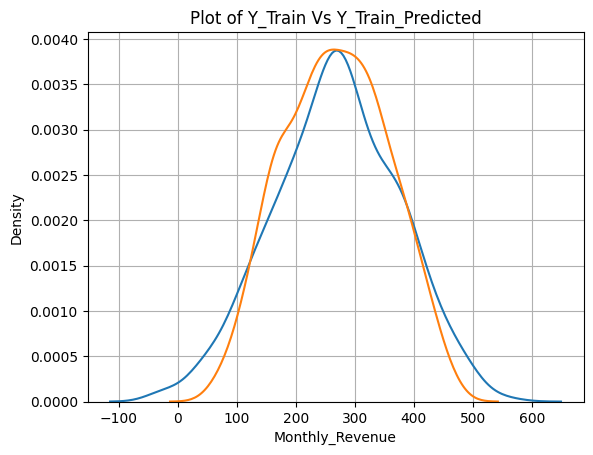

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6686232170766755
The RMSE score for Test data is: 57.03354584991667


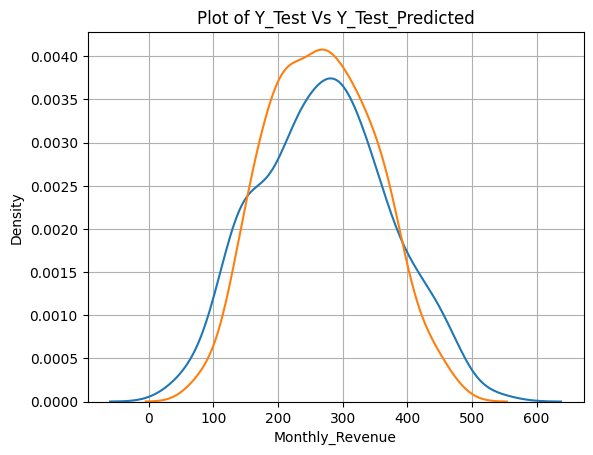

In [16]:
y_pred_train = lr.predict(x_train)
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train,squared=False)}")  
sns.kdeplot(y_train)
sns.kdeplot(y_pred_train)
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred,squared=False)}")
sns.kdeplot(y_test)
sns.kdeplot(y_pred)
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.show()

# Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([221.24617483, 301.15957412, 251.3293657 , 216.45659725,
       151.67789277, 304.47614299, 304.30439181, 442.85495849,
       335.69031006, 144.76776259, 367.1711011 , 336.29082848,
       496.65368673, 410.645005  , 309.35909562, 141.54352091,
        57.31941977, 251.31875909, 110.22876748, 268.70955919,
       101.80258567, 315.83373535, 275.00921026, 191.05706211,
       343.71711183, 232.86245824, 395.54291156, 367.5586697 ,
       305.95012094, 372.04628256, 355.54291492, 255.53803161,
       291.08910786, 251.84569806, 338.41565675, 275.00921026,
       227.76646065, 231.04123356, 203.37598814, 229.26251142,
       162.88115055, 211.38944801, 141.32032317, 234.23479866,
       446.21733284, 209.31432483, 308.70837897, 304.24868444,
       239.54694933, 292.97732669, 387.03180436, 227.6197437 ,
       340.70900416, 143.42095985, 462.10452937, 155.95209505,
       367.80918361, 439.97554966, 227.76646065, 300.9057773 ,
       417.15860671, 211.37362547, 255.98737275, 276.06

In [19]:
r2_score_dt = r2_score(y_test,y_pred_dt)

The Train r2 score is: 1.0
The RMSE score for Train data is: 0.0


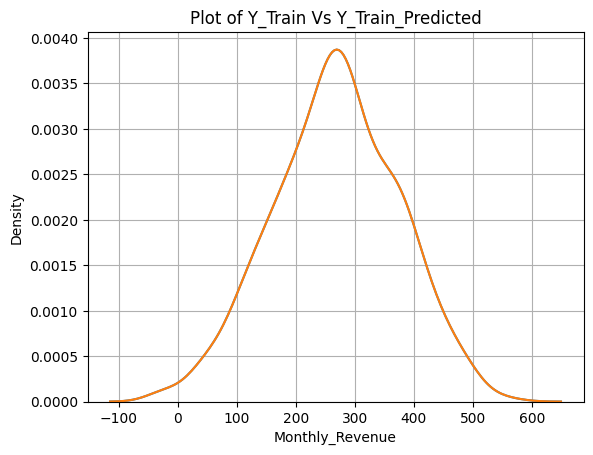

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6686232170766755
The RMSE score for Test data is: 57.03354584991667


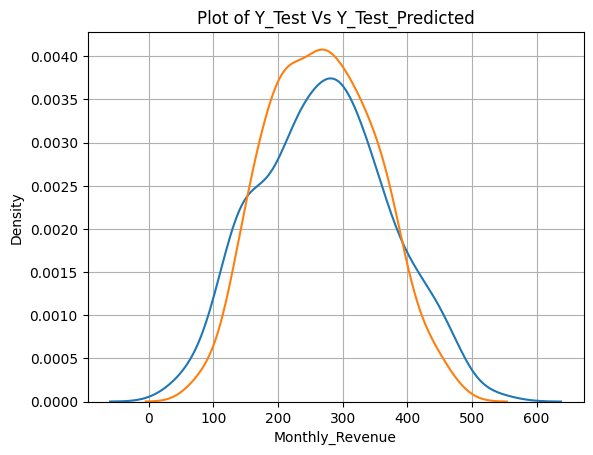

In [20]:
y_pred_train = dt.predict(x_train)
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train,squared=False)}")  
sns.kdeplot(y_train)
sns.kdeplot(y_pred_train)
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred,squared=False)}")
sns.kdeplot(y_test)
sns.kdeplot(y_pred)
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.show()

# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
y_pred_rfr = rfr.predict(x_test)
y_pred_rfr

array([220.56411031, 267.07326493, 277.77294638, 160.05638171,
       126.78673473, 193.56897171, 305.89447166, 373.6579672 ,
       361.25078857, 210.12692894, 336.8421076 , 240.42164554,
       460.41380158, 367.14498675, 319.4910694 , 225.0515983 ,
       147.88621028, 245.85160851, 145.72614778, 311.48417874,
       109.00454716, 330.99930457, 210.8707224 , 193.48831266,
       338.54304902, 296.4739297 , 339.22699776, 329.1401355 ,
       285.74215067, 328.25409966, 320.88410999, 261.74967205,
       258.73365978, 262.73588152, 329.12839506, 222.97046113,
       206.03179459, 165.39768831, 268.4674241 , 310.72701997,
       166.40215822, 129.72224298, 202.27210811, 177.06026331,
       399.26933441, 274.24301183, 319.0120812 , 350.31847396,
       210.48236644, 295.50187584, 392.6736375 , 185.74939515,
       227.08017731, 195.3568988 , 339.76764472, 147.84305964,
       328.75200771, 411.21273687, 224.92109558, 273.30449703,
       405.5694416 , 281.66044715, 192.29581849, 250.38

In [23]:
r2_score_rfr = r2_score(y_test,y_pred_rfr)

The Train r2 score is: 0.9481110399413005
The RMSE score for Train data is: 24.1299494362555


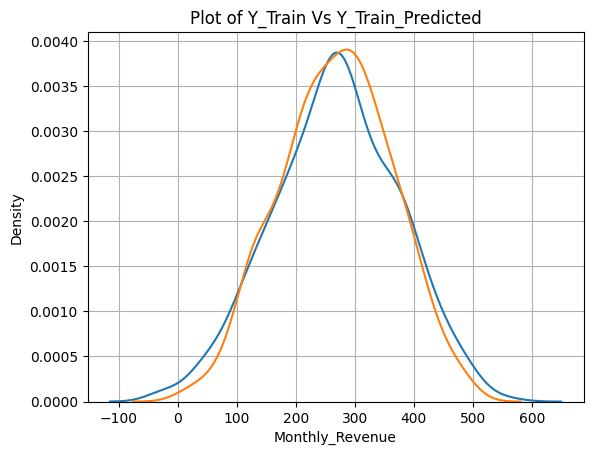

----------------------------------------------------------------------------------------------------
The Test r2 score is: 0.6686232170766755
The RMSE score for Test data is: 57.03354584991667


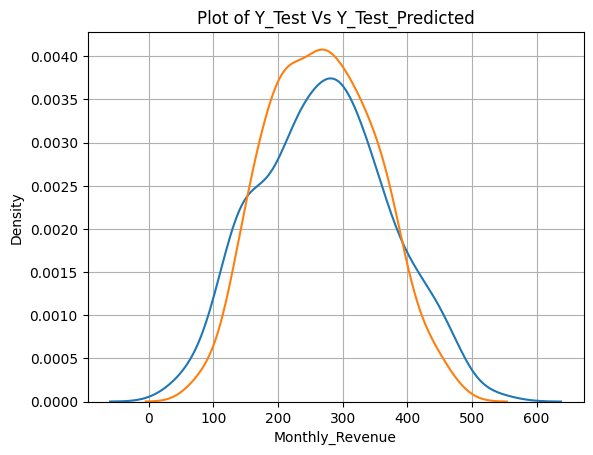

In [24]:
y_pred_train = rfr.predict(x_train)
print(f"The Train r2 score is: {r2_score(y_train,y_pred_train)}")  
print(f"The RMSE score for Train data is: {mean_squared_error(y_train,y_pred_train,squared=False)}")  
sns.kdeplot(y_train)
sns.kdeplot(y_pred_train)
plt.grid()
plt.title('Plot of Y_Train Vs Y_Train_Predicted')
plt.show()
print("--"*50)
print(f"The Test r2 score is: {r2_score(y_test,y_pred)}")
print(f"The RMSE score for Test data is: {mean_squared_error(y_test,y_pred,squared=False)}")
sns.kdeplot(y_test)
sns.kdeplot(y_pred)
plt.grid()
plt.title('Plot of Y_Test Vs Y_Test_Predicted')
plt.show()

Hence Linear Regression gives better performance with r2_score of 66.86%.

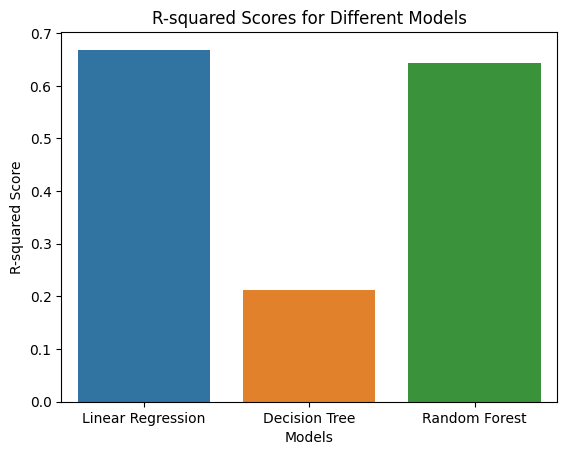

In [25]:
sns.barplot(x=['Linear Regression', 'Decision Tree', 'Random Forest'],
            y=[r2_score_lr, r2_score_dt, r2_score_rfr])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different Models')
plt.show()